In [54]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\prerana\Downloads\googleplaystore.csv")

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


4.193338315362443

In [11]:
sum(df['Rating'])

nan

# Finding average rating

In [15]:
round(df['Rating'].mean(),4)

4.1933

In [58]:
c=0
for i in df['Rating']:
    if i==5:
        c+=1
print(c)

274


## Total number of categories

In [60]:
for i in df['Category'].unique():
    print(i)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION


In [62]:
print('there are total',len(df['Category'].unique()),'categories')

there are total 33 categories


# Total apps in ART_AND_DESIGN

In [64]:
c=0
for i in df['Category']:
    if i=='ART_AND_DESIGN':
        c+=1
print('total apps in ART_AND_DESIGN category are',c)

total apps in ART_AND_DESIGN category are 61


In [66]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [68]:
f=0
for i in df['Type']:
    if i=='Free':
        f+=1
print('there are total',f,'free apps',end='')

p=0
for i in df['Type']:
    if i=='Paid':
        p+=1
print(' and',p,'paid apps')

there are total 8715 free apps and 645 paid apps


In [70]:
print('there are ',int(f/(f+p)*100),'% of applications are free')

there are  93 % of applications are free


In [72]:
print('there are ',int(p/(f+p)*100),'% of applications are paid')

there are  6 % of applications are paid


## Name all the content rating

In [74]:
for i in df['Content Rating'].unique():
    print(i)

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


# count number of apps in all categories

In [85]:
category={}
for name in df['Category'].unique():
    ct=0
    for i in df['Category']:
        if (i==name):
            ct+=1
    category[name]=ct
for i,j in category.items():
    print(i,j)

ART_AND_DESIGN 61
AUTO_AND_VEHICLES 73
BEAUTY 42
BOOKS_AND_REFERENCE 178
BUSINESS 303
COMICS 58
COMMUNICATION 328
DATING 195
EDUCATION 155
ENTERTAINMENT 149
EVENTS 45
FINANCE 323
FOOD_AND_DRINK 109
HEALTH_AND_FITNESS 297
HOUSE_AND_HOME 76
LIBRARIES_AND_DEMO 64
LIFESTYLE 314
GAME 1097
FAMILY 1746
MEDICAL 350
SOCIAL 259
SHOPPING 238
PHOTOGRAPHY 317
SPORTS 319
TRAVEL_AND_LOCAL 226
TOOLS 733
PERSONALIZATION 312
PRODUCTIVITY 351
PARENTING 50
WEATHER 75
VIDEO_PLAYERS 160
NEWS_AND_MAGAZINES 233
MAPS_AND_NAVIGATION 124


# count number of apps in each type

In [94]:
type={}
for name in df['Type'].unique():
    ct=0
    for i in df['Type']:
        if (i==name):
            ct+=1
    type[name]=ct
for i,j in type.items():
    print(i,j)

Free 8715
Paid 645


# count number of apps in each content rating

In [103]:
content_rating={}
for name in df['Content Rating'].unique():
    ct=0
    for i in df['Content Rating']:
        if (i==name):
            ct+=1
    content_rating[name]=ct
for i,j in content_rating.items():
    print(i,':',j)

Everyone : 7414
Teen : 1084
Everyone 10+ : 397
Mature 17+ : 461
Adults only 18+ : 3
Unrated : 1


# Handling null values = numeric

## 1.delete all rows with null values

In [111]:
df=pd.read_csv(r'C:\Users\prerana\Desktop\data.csv')

In [113]:
df

,country,age,salary,purchased
0,france,44.0,72000.0,yes
1,spain,27.0,48000.0,yes
2,NaN,30.0,54000.0,NaN
3,spain,38.0,61000.0,no
4,germany,40.0,NaN,yes
5,france,35.0,58000.0,yes
6,spain,NaN,52000.0,no
7,france,48.0,79000.0,yes
8,germany,50.0,83000.0,no
9,france,37.0,67000.0,yes


In [115]:
df.dropna()

,country,age,salary,purchased
0,france,44.0,72000.0,yes
1,spain,27.0,48000.0,yes
3,spain,38.0,61000.0,no
5,france,35.0,58000.0,yes
7,france,48.0,79000.0,yes
8,germany,50.0,83000.0,no
9,france,37.0,67000.0,yes


## 2. Imputer

In [118]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [122]:
imputer.fit(df.iloc[:,1:3].values)

SimpleImputer()

In [124]:
x=imputer.transform(df.iloc[:,1:3].values)

In [126]:
x

array([[4.40000000e+01, 7.20000000e+04],
       [2.70000000e+01, 4.80000000e+04],
       [3.00000000e+01, 5.40000000e+04],
       [3.80000000e+01, 6.10000000e+04],
       [4.00000000e+01, 6.37777778e+04],
       [3.50000000e+01, 5.80000000e+04],
       [3.87777778e+01, 5.20000000e+04],
       [4.80000000e+01, 7.90000000e+04],
       [5.00000000e+01, 8.30000000e+04],
       [3.70000000e+01, 6.70000000e+04]])

In [128]:
df.iloc[:,1:3]=x

In [130]:
df

,country,age,salary,purchased
0,france,44.000000,72000.000000,yes
1,spain,27.000000,48000.000000,yes
2,NaN,30.000000,54000.000000,NaN
3,spain,38.000000,61000.000000,no
4,germany,40.000000,63777.777778,yes
5,france,35.000000,58000.000000,yes
6,spain,38.777778,52000.000000,no
7,france,48.000000,79000.000000,yes
8,germany,50.000000,83000.000000,no
9,france,37.000000,67000.000000,yes


# working on categorical data

In [148]:
imputer1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer1.fit(df.iloc[:,:1].values)
df.iloc[:,:1]=imputer1.transform(df.iloc[:,:1].values)

In [150]:
df

,country,age,salary,purchased
0,france,44.000000,72000.000000,yes
1,spain,27.000000,48000.000000,yes
2,france,30.000000,54000.000000,NaN
3,spain,38.000000,61000.000000,no
4,germany,40.000000,63777.777778,yes
5,france,35.000000,58000.000000,yes
6,spain,38.777778,52000.000000,no
7,france,48.000000,79000.000000,yes
8,germany,50.000000,83000.000000,no
9,france,37.000000,67000.000000,yes


In [152]:
imputer1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer1.fit(df.iloc[:,3:].values)
df.iloc[:,3:]=imputer1.transform(df.iloc[:,3:].values)

In [154]:
df

,country,age,salary,purchased
0,france,44.000000,72000.000000,yes
1,spain,27.000000,48000.000000,yes
2,france,30.000000,54000.000000,yes
3,spain,38.000000,61000.000000,no
4,germany,40.000000,63777.777778,yes
5,france,35.000000,58000.000000,yes
6,spain,38.777778,52000.000000,no
7,france,48.000000,79000.000000,yes
8,germany,50.000000,83000.000000,no
9,france,37.000000,67000.000000,yes


# removing null values for google play store

In [165]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [167]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [173]:
imput=SimpleImputer(missing_values=np.nan,strategy='mean')
imput.fit(df.iloc[:,2:3].values)
df.iloc[:,2:3]=imput.transform(df.iloc[:,2:3].values)

In [179]:
df.iloc[:,2:3].isnull().sum()

Rating    0
dtype: int64

In [181]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# understanding data set

## 1. dimensions of dataset

In [208]:
df.shape

(10841, 13)

## 2. how does data look like

In [210]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [212]:
df.sample(5) #random 5 values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1011,"SeatGeek – Tickets to Sports, Concerts, Broadway",EVENTS,4.4,15558,26M,"1,000,000+",Free,0,Everyone,Events,"August 3, 2018",2018.07.31229,5.0 and up
5226,Dash Tag - Fun Endless Runner!,FAMILY,4.5,6750,43M,"100,000+",Free,0,Everyone,Casual,"June 13, 2018",2.0.3,4.3 and up
8297,Babbel – Learn Languages,FAMILY,4.3,267787,21M,"10,000,000+",Free,0,Everyone,Education,"July 30, 2018",20.7.2,4.4 and up
1586,Beautiful Design Birthday Cake,LIFESTYLE,4.3,665,3.0M,"500,000+",Free,0,Everyone,Lifestyle,"August 4, 2018",2.0,2.3 and up
8626,Sword Art Online: Integral Factor,FAMILY,4.0,45359,32M,"1,000,000+",Free,0,Everyone 10+,Role Playing,"July 26, 2018",1.0.9,4.4 and up


## 3. what is data type of columns

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 4. Are there any missing values

In [216]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 5.how does data look like mathematically

In [223]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 6. Are there any duplicate values

In [226]:
df.duplicated().sum()

483

## 7. how manny unique values are there in each column

In [229]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [233]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

## 8. Are there any outliers in numerical columns

<Axes: ylabel='Rating'>

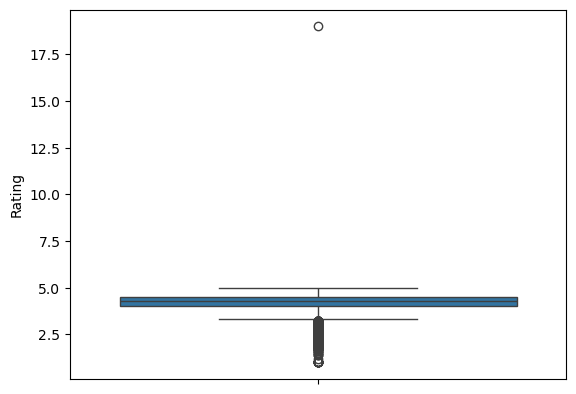

In [244]:
sns.boxplot(df['Rating'])

# Dealing with missing values

In [253]:
df1=pd.read_csv(r"C:\Users\prerana\Downloads\googleplaystore.csv")

In [255]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 1. Deleting the column with missing data

In [257]:
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [259]:
df1.drop('Rating',axis=1,inplace=True) #deleting the whole column

In [261]:
df1.isna().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

## Deleting the row with missing data

In [268]:
df2=df.copy()

In [270]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [272]:
df2.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [274]:
df2.shape

(10841, 13)

In [276]:
df2.dropna(inplace=True)

In [280]:
df2.shape

(9360, 13)

In [282]:
df2.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 3. Filling the missing values - imputation

In [336]:
df3=df.copy()

In [340]:
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [342]:
df3.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [344]:
mean_value=df3['Rating'].mean()

In [346]:
mean_value

4.193338315362443

In [348]:
df3['Rating'].fillna(mean_value,inplace=True)

C:\Users\prerana\AppData\Local\Temp\ipykernel_12784\2080043659.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Rating'].fillna(mean_value,inplace=True)


In [350]:
df3.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

## 4.Filling categorical data

In [324]:
df3.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [352]:
df3.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [356]:
df3.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [366]:
df3['Android Ver'].value_counts().index[0]

'4.1 and up'

In [368]:
df3['Android Ver'].fillna(df3['Android Ver'].value_counts().index[0],inplace=True)

C:\Users\prerana\AppData\Local\Temp\ipykernel_12784\1962579587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Android Ver'].fillna(df3['Android Ver'].value_counts().index[0],inplace=True)


In [370]:
df3.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

### creating new category

In [403]:
df4=df.copy()

In [405]:
df4.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [407]:
df4.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [409]:
df4['Rating'].fillna('not revieved',inplace=True)

C:\Users\prerana\AppData\Local\Temp\ipykernel_12784\527049271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['Rating'].fillna('not revieved',inplace=True)
C:\Users\prerana\AppData\Local\Temp\ipykernel_12784\527049271.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'not revieved' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df4['Rating'].fillna('not revieved',inplace=True)


In [411]:
df4.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10821,Poop FR,FAMILY,not revieved,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10822,PLMGSS FR,PRODUCTIVITY,not revieved,0,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up
10823,List iptv FR,VIDEO_PLAYERS,not revieved,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
10824,Cardio-FR,MEDICAL,not revieved,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,not revieved,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


In [413]:
df4.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

## 5.Advance imputation

In [418]:
df5=df.copy()

In [422]:
df5.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10822,PLMGSS FR,PRODUCTIVITY,NaN,0,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up
10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


In [420]:
df5.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [424]:
df5['Rating'].interpolate(inplace=True)

C:\Users\prerana\AppData\Local\Temp\ipykernel_12784\2107656508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df5['Rating'].interpolate(inplace=True)


### Interpolation is a method of estimating missing values in a sequence based on known values around them.
### By default, interpolate() uses linear interpolation, 
### which fills each missing value by calculating a value that falls on the straight line between the previous and next valid data points in the column.

In [426]:
df5.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10821,Poop FR,FAMILY,4.833333,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10822,PLMGSS FR,PRODUCTIVITY,4.666667,0,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up
10823,List iptv FR,VIDEO_PLAYERS,4.500000,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
10824,Cardio-FR,MEDICAL,4.333333,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,4.166667,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.000000,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.200000,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.400000,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.600000,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.800000,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


# DEALING WITH DUPLICATED ROWS

In [429]:
df.duplicated().sum()

483

In [431]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [433]:
df[df.duplicated()] #shows all duplicated rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [437]:
df[df.duplicated(keep='first')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [439]:
df[df.duplicated(keep='last')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,ABC News - US & World News,NEWS_AND_MAGAZINES,4.0,18976,35M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"June 6, 2018",3.19.11,5.0 and up
3788,NBC News,NEWS_AND_MAGAZINES,4.1,63020,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"February 13, 2018",Varies with device,Varies with device
3790,USA TODAY,NEWS_AND_MAGAZINES,4.1,49259,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"August 2, 2018",Varies with device,Varies with device
3792,CNN Breaking US & World News,NEWS_AND_MAGAZINES,4.0,293080,25M,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"August 6, 2018",5.17,4.4 and up


In [443]:
df[df.duplicated(keep=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [465]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [471]:
df['App'].duplicated().sum()

1181

In [445]:
cities=['new_york','los angeles','chicago','houston','phonenix','los angeles','chicago']
rankings=[1,2,3,4,5,6,7]
scores=[9.8,9.5,9.2,8.7,8.5,8.2,8.1]
data={'city':cities,'ranking':rankings,'score':scores}
df=pd.DataFrame(data)

In [447]:
df

,city,ranking,score
0,new_york,1,9.8
1,los angeles,2,9.5
2,chicago,3,9.2
3,houston,4,8.7
4,phonenix,5,8.5
5,los angeles,6,8.2
6,chicago,7,8.1


In [449]:
df.duplicated().sum()

0

In [451]:
df['city'].duplicated().sum()

2

In [457]:
df.drop_duplicates('city',keep=False)

,city,ranking,score
0,new_york,1,9.8
3,houston,4,8.7
4,phonenix,5,8.5


In [459]:
df.drop_duplicates('city',keep='first')

,city,ranking,score
0,new_york,1,9.8
1,los angeles,2,9.5
2,chicago,3,9.2
3,houston,4,8.7
4,phonenix,5,8.5


In [461]:
df.drop_duplicates('city',keep='last')

,city,ranking,score
0,new_york,1,9.8
3,houston,4,8.7
4,phonenix,5,8.5
5,los angeles,6,8.2
6,chicago,7,8.1


# Removing outlier using quartile

In [22]:
df=pd.read_csv(r"C:\Users\prerana\Downloads\weight-height.csv")

In [24]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


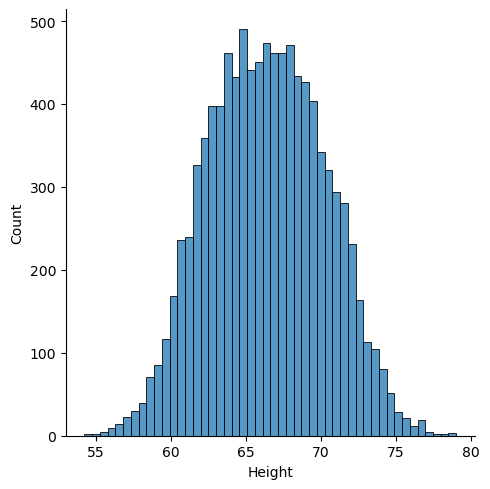

In [26]:
sns.displot(df['Height'])

<Axes: ylabel='Height'>

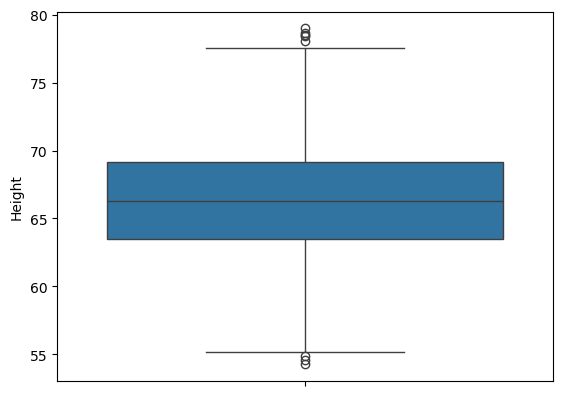

In [493]:
sns.boxplot(df['Height'])

In [30]:
min_limit=df['Height'].quantile(0.01)
max_limit=df['Height'].quantile(0.99)

In [32]:
min_limit

58.13441158671655

In [34]:
max_limit

74.7857900583366

In [48]:
new_df=df[(df['Height']>min_limit) & (df['Height']<max_limit)]

In [50]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: ylabel='Height'>

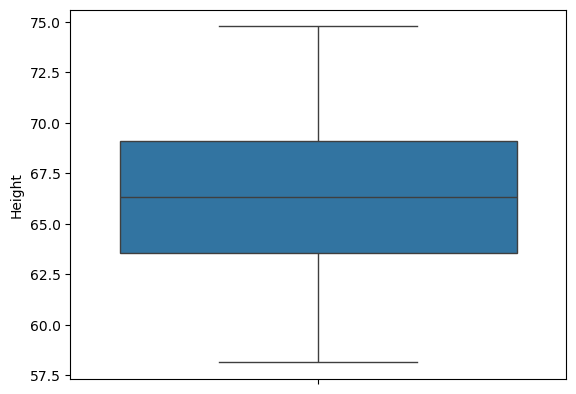

In [52]:
sns.boxplot(new_df['Height'])